Explicación de los cambios respecto a Qiskit
✅ Usa cirq.Circuit() en lugar de QuantumCircuit
✅ cirq.Moment() para simular barrier()
✅ Simulación con cirq.Simulator() en lugar de Aer.get_backend('aer_simulator')
✅ Resultados extraídos con result.histogram(key="result") y graficados con Matplotlib

In [5]:
import cirq
import matplotlib.pyplot as plt

def bernstein_vazirani_cirq(n, s):
    """ Bernstein-Vazirani """
    qubits = [cirq.LineQubit(i) for i in range(n + 1)]
    circuit = cirq.Circuit()


    circuit += [cirq.X(qubits[-1])]  
    circuit += cirq.H.on_each(*qubits)  

 
    circuit += cirq.Moment()

   
    for i, bit in enumerate(reversed(s)):
        if bit == "1":
            circuit += cirq.CX(qubits[i], qubits[-1])

 

  
    circuit += cirq.H.on_each(*qubits[:-1])

 
    circuit += cirq.measure(*qubits[:-1], key="result")

    return circuit

# Parámetros
n = 4
s = "1101"


circuit = bernstein_vazirani_cirq(n, s)
print("Circuito en Cirq:")
print(circuit)



Circuito en Cirq:
0: ───H───────@───H───────────M('result')───
              │               │
1: ───H───H───┼───────────────M─────────────
              │               │
2: ───H───────┼───@───H───────M─────────────
              │   │           │
3: ───H───────┼───┼───@───H───M─────────────
              │   │   │
4: ───X───H───X───X───X─────────────────────


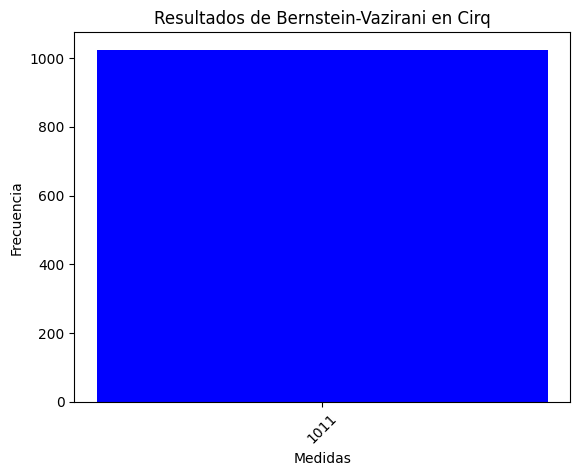

In [6]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)
histogram = result.histogram(key="result")


plt.bar([bin(k)[2:].zfill(n) for k in histogram.keys()], histogram.values(), color='blue')
plt.xlabel("Medidas")
plt.ylabel("Frecuencia")
plt.title("Resultados de Bernstein-Vazirani en Cirq")
plt.xticks(rotation=45)
plt.show()